# Recommendation System(Content and Collaborative)

In [1]:
#Importing the required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [2]:
#users dataset
filename1 = 'users.csv'
users_df = pd.read_csv(filename1)

#posts dataset
filename2 = 'posts.csv'
posts_df = pd.read_csv(filename2)

#views dataset
filename3 = 'views.csv'
views_df = pd.read_csv(filename3)

### Analyse users data set

In [3]:
print(users_df.shape)
users_df.head()

(118, 4)


,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [4]:
#check for null values in users dataset
users_df.isnull().sum()

_id          0
name         0
gender       0
academics    0
dtype: int64

In [5]:
#repleace the _id as user_id
users_df = users_df.rename(index=str, columns={"_id": "user_id"})
users_df.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


### Analyse posts data set

In [6]:
print(posts_df.shape)
posts_df.head()

(493, 4)


,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [7]:
#check for null in posts dataset, there are 28 null values, to be replaced as some other value
posts_df.isnull().sum()

_id            0
title          0
category      28
 post_type     0
dtype: int64

In [8]:
posts_df = posts_df.rename(index=str, columns={"_id": "post_id"})
posts_df = posts_df.rename(index=str, columns={" post_type": "post_type"})

posts_df.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [9]:
null_post_index = posts_df[posts_df['category'].isnull()==True].index
posts_df.loc[null_post_index,'category'] = 'general' + " " + posts_df.loc[null_post_index,'post_type']

In [10]:
posts_df.isnull().sum()

post_id      0
title        0
category     0
post_type    0
dtype: int64

In [11]:
posts_df.loc[null_post_index,'category'].unique()

array(['general project', 'general blog'], dtype=object)

### Analyse views data set

In [12]:
views_df.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [13]:
print(views_df.shape)
views_df.isnull().sum()

(1449, 3)


user_id      0
post_id      0
timestamp    0
dtype: int64

### Lets merge views and posts data set on the basis of common "post_id"

In [14]:
views_posts = views_df.merge(posts_df, on = 'post_id', how = 'left')
views_posts.head()

,user_id,post_id,timestamp,title,category,post_type
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog


### Lets merge users with merged views and posts datasetson "user_id"

In [15]:
views_posts_users = views_posts.merge(users_df,on = 'user_id',how='left')

In [16]:
views_posts_users.head()


,user_id,post_id,timestamp,title,category,post_type,name,gender,academics
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate


In [17]:
views_posts_users.shape

(1449, 9)

In [18]:
views_posts_users.isnull().sum()

user_id      0
post_id      0
timestamp    0
title        2
category     2
post_type    2
name         0
gender       0
academics    0
dtype: int64

In [19]:
views_posts_users.dropna(inplace=True)

In [20]:
views_posts_users.isnull().sum()

user_id      0
post_id      0
timestamp    0
title        0
category     0
post_type    0
name         0
gender       0
academics    0
dtype: int64

In [21]:
views_posts_users.shape

(1447, 9)

## Lets do some EDA and wrangling of the datasets, to understand the underlying information

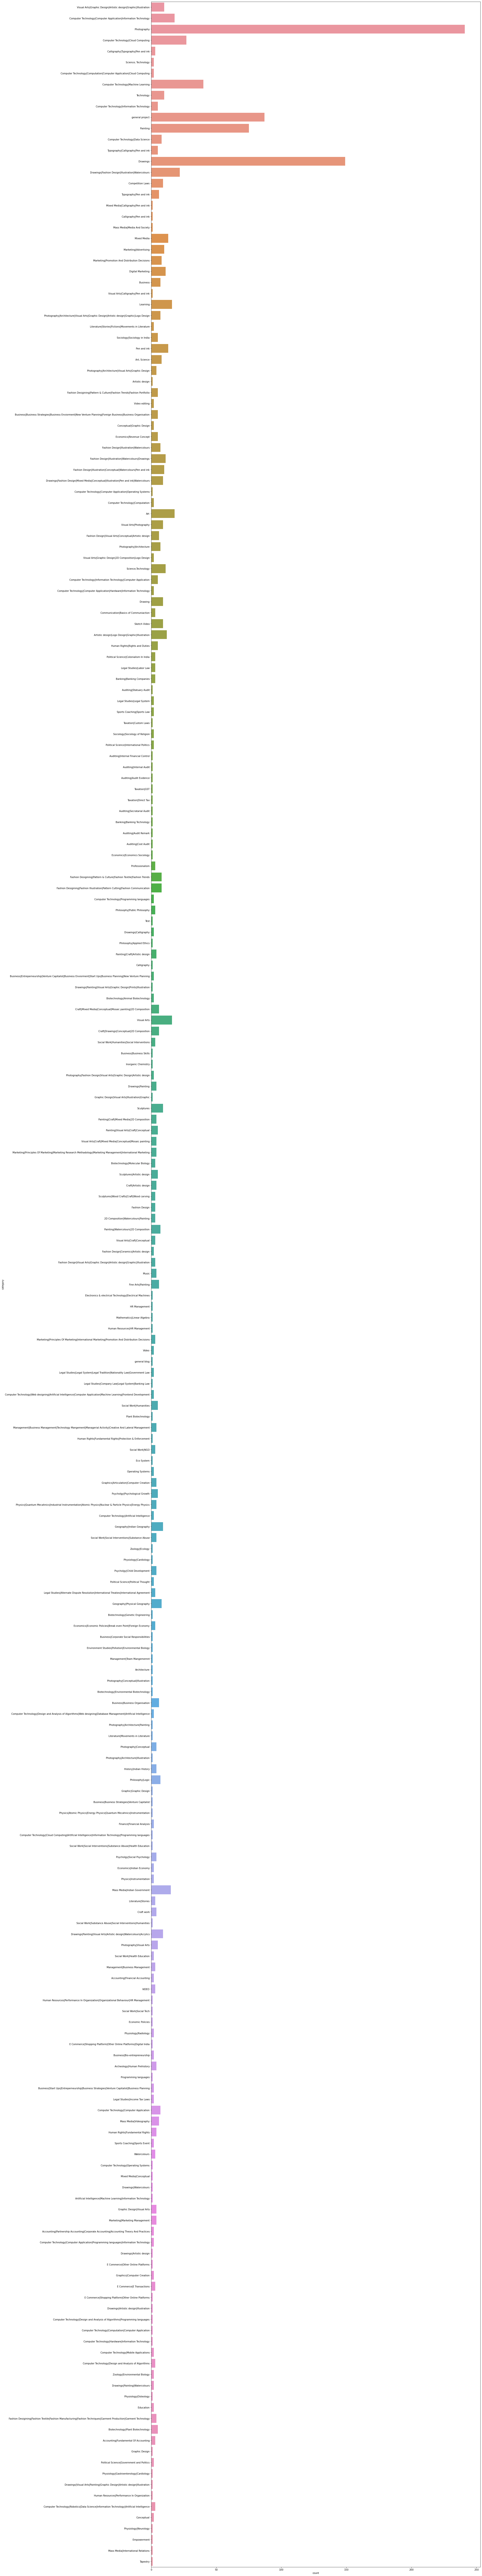

In [22]:
#Category count plot 

plt.figure(figsize=(25,200))
sns.countplot(y = views_posts_users['category'])
plt.show()

### photography, painting and drawing seem to be some popular categories

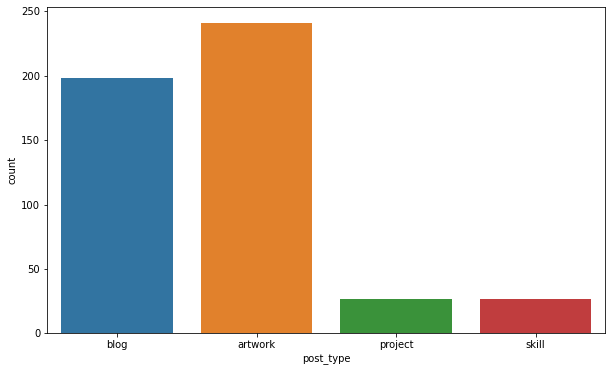

In [23]:
# post type countplot
plt.figure(figsize=(10,6))
sns.countplot(x = posts_df['post_type'])
plt.show()

### artwork and block are quite popular post types

<function matplotlib.pyplot.show(*args, **kw)>

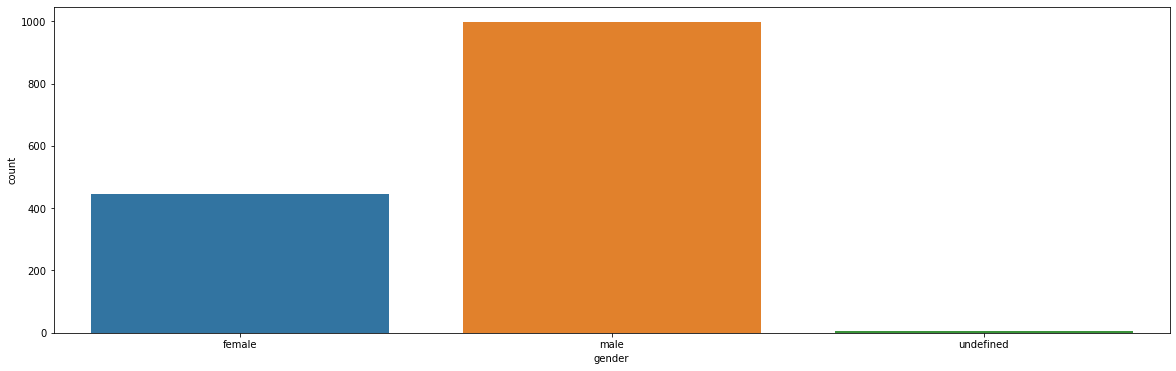

In [24]:
## genderwise count plot
plt.figure(figsize=(20,6))
sns.countplot(views_posts_users['gender'])
plt.show

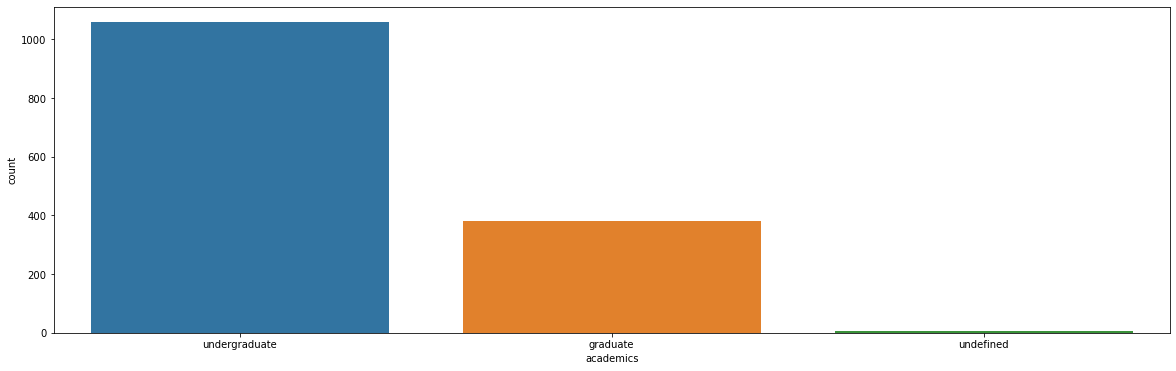

In [25]:
#Academics count plot of users
plt.figure(figsize=(20,6))
sns.countplot(views_posts_users['academics'])

In [26]:
## Plotting only top 10 categories

category_data = views_posts_users['category'].value_counts()

In [27]:
category_data[:10].keys()

Index(['Photography', 'Drawings', 'general project', 'Painting',
       'Computer Technology|Machine Learning',
       'Computer Technology|Cloud Computing',
       'Drawings|Fashion Design|Illustration|Watercolours',
       'Computer Technology|Computer Application|Information Technology',
       'Art', 'Learning'],
      dtype='object')

In [28]:
category_data[:10].values

array([241, 149,  87,  75,  40,  27,  22,  18,  18,  16], dtype=int64)

In [29]:
top_cat_df= pd.DataFrame()

In [30]:
top_cat_df['cat'] = category_data[:10].keys()
top_cat_df['val'] = category_data[:10].values

In [31]:
top_cat_df.head()

,cat,val
0,Photography,241
1,Drawings,149
2,general project,87
3,Painting,75
4,Computer Technology|Machine Learning,40


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

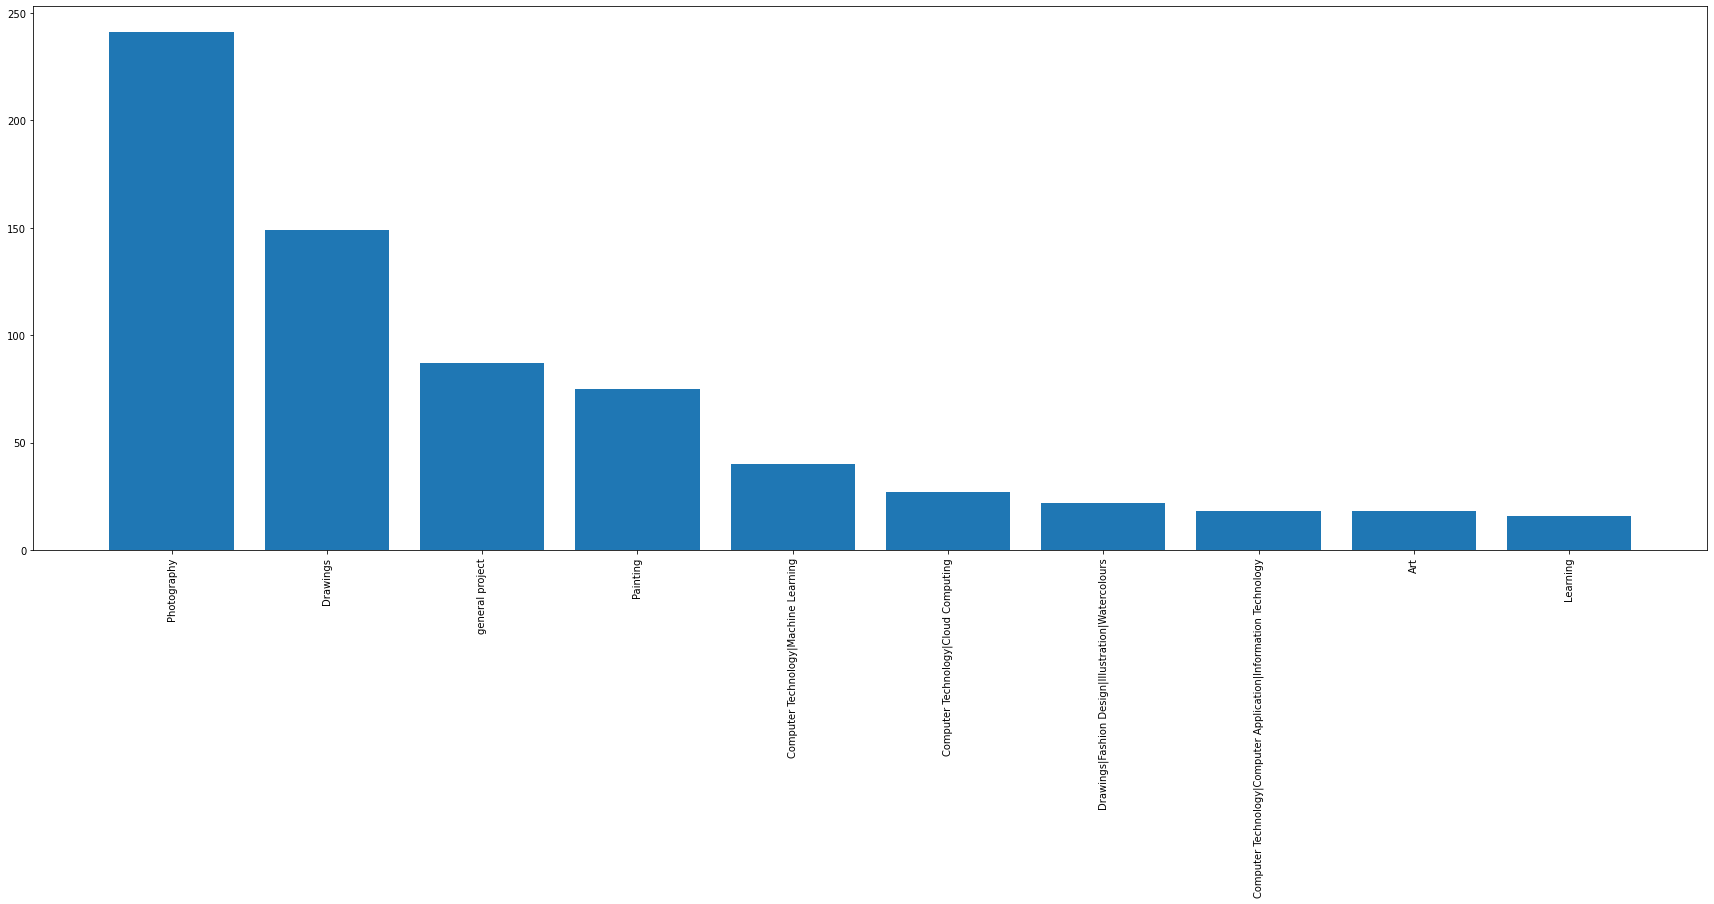

In [32]:

plt.figure(figsize=(30,10))
plt.bar(x = top_cat_df['cat'],height = top_cat_df['val'])
plt.xticks(rotation=90)

## Content based recommendation 
#### instead of using only category  using the type and title as well ,
#### since those data will be processed as well, helping to do better recommendation
#### adding a new column to posts_df (cat_metadata: by joininng title, category and post type)




In [33]:
# Keeping a copy
posts_meta_df = posts_df.copy()

In [34]:

posts_df['cat_metadata'] = posts_df['title'] + " " + posts_df['category'] + " " + posts_df['post_type']

In [35]:
posts_df.head()

,post_id,title,category,post_type,cat_metadata
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


In [36]:
# passing this metadata to the vectoriser to create the matix 

tfv = TfidfVectorizer(min_df = 0,
                      max_features=None, 
                      analyzer = 'word',
                      strip_accents = 'unicode',
                      ngram_range=(1,8), 
                      stop_words='english')

In [37]:
#Fitting TF-IDF on the cat_metadata
tfv_matrix = tfv.fit_transform(posts_df['cat_metadata'])

In [38]:
tfv_matrix

<493x9303 sparse matrix of type '<class 'numpy.float64'>'
	with 13099 stored elements in Compressed Sparse Row format>

In [39]:
tfv_matrix.shape

(493, 9303)

# Few thoughts on cosine similarity

#### Similarity Score :
How does it decide which item is most similar to the item user likes? Here we use the similarity scores.

It is a numerical value ranges between zero to one which helps to determine,
how much two items are similar to each other on a scale of zero to one. 
This similarity score is obtained measuring the similarity between the text details of both of the items. 
So, similarity score is the measure of similarity between given text details of two items. 
This can be done by cosine-similarity.

#### How Cosine Similarity works?
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. 
Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. 

The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. 
The smaller the angle, higher the cosine similarity.(cos 90 = 0 , cos 0 = 1)


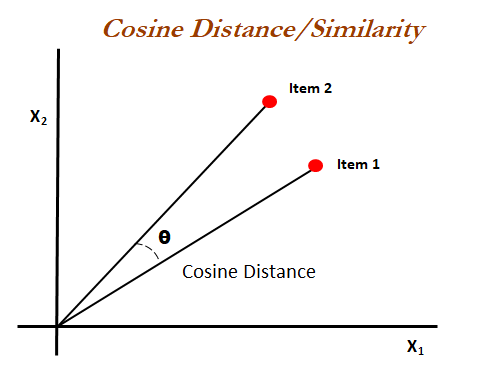



In [40]:
#compute the sigmoid kernel
cosine_similarities = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [41]:
#Reverse mapping of the indices with the post id

indices = pd.Series(posts_df.index, index=posts_df['post_id']).drop_duplicates()
indices.head()

post_id
5d62abaa65218653a132c956    0
5d6d39567fa40e1417a4931c    1
5d7d23315720533e15c3b1ee    2
5d7d405e5720533e15c3b1f3    3
5d80dfbc6c53455f896e600e    4
dtype: object

In [42]:
def give_rec(post_id, cosine_similarities,indices):
    # Get the index corresponding to original
    idx = int(indices[post_id])

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(cosine_similarities[idx]))

    # Sort the posts, as per the score 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar posts
    sig_scores = sig_scores[1:11]

    # post indices
    req_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return posts_df.iloc[req_indices,:-1]

In [43]:
post = posts_df[posts_df['post_id']== '5d6d39567fa40e1417a4931c']['title']
print("Recommending for post: ",post[0] )
give_rec('5d6d39567fa40e1417a4931c', cosine_similarities,indices)


Recommending for post:  Ml and AI


,post_id,title,category,post_type
122,5e5bdf4fd701ab08af792bfd,Artificial Intelligence,Computer Technology|Artificial Intelligence,blog
128,5e65346c85ae350860168b53,What is Information technology?,Computer Technology|Information Technology,blog
486,5ed2502b76027d35905cc7db,Learning...,Computer Technology|Machine Learning,blog
16,5dadf6ae610ba040fbfdf5c8,MIS,Computer Technology|Information Technology,blog
110,5e51a46ad701ab08af7929cf,Ethernet,Computer Technology|Information Technology,blog
170,5e7c78fdcfc8b713f5ac7daa,Types Of AI.,Computer Technology|Artificial Intelligence,blog
456,5ecfa0ca76027d35905cbf57,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog
450,5ecd5d417023451e662235c5,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog
224,5e897ab4a3258347b42f25ca,10 Best Artificial Intelligence (AI) Courses O...,Computer Technology|Machine Learning,blog
455,5ecf96e876027d35905cbf46,GAN's Part(2),Computer Technology|Machine Learning,blog


In [44]:
post = posts_df[posts_df['post_id']== '5eac305f10426255a7aa9dd3']['title']
print("Recommending for post: ",post[0] )
give_rec('5eac305f10426255a7aa9dd3', cosine_similarities,indices)

Recommending for post:  She got a new hairstyle! Photo by Chirag


,post_id,title,category,post_type
367,5eac315210426255a7aa9dfe,Street Art by Chirag.,Photography,artwork
338,5ea1d7ac10426255a7aa9a66,Too much?,Photography,artwork
451,5ecd6ba47023451e66223604,Be yourself !!,Photography,artwork
252,5e9483b6a3258347b42f2860,PEACE,Photography,artwork
260,5e948db6a3258347b42f28b2,peace,Photography,artwork
347,5ea321dd10426255a7aa9abd,Peace.,Photography,artwork
205,5e8307ada3258347b42f23ec,Aesthetic,Photography,artwork
345,5ea31faf10426255a7aa9ab5,Aesthetic.,Photography,artwork
348,5ea3227010426255a7aa9ac1,Aesthetic.,Photography,artwork
364,5eabf76a10426255a7aa9cfb,Street Art Photo by Mathilde Decourcelle,Photography,artwork




## Collaborative based recommendation 



### Lets try to give rating to each post, depending upon the count between 1 to 10

### Feature Scaling : Min - Max normalisation

To rescale a range between an arbitrary set of values [a, b], the formula becomes:

 x(new) = a + ((x - min(x)  (b -a) )/ max(x) - min(x)
 
 using the same to rate the posts between the ratings 1 to 5


In [45]:
post_dict  = dict(views_posts_users['post_id'].value_counts())
val = views_posts_users['post_id'].value_counts().tolist()

In [46]:
# assign the ratings to the dict keys now
for key, value in post_dict.items():
        post_dict[key] = (4)*((value-min(val))/(max(val)-min(val))) + 1

In [47]:
# now assign the rating to the corresponding post in the dataframe
for key, value in post_dict.items():
        views_posts_users.loc[views_posts_users['post_id'] == key ,'rating'] = value

In [48]:
views_posts_users.drop(['timestamp'],axis=1, inplace=True)

In [49]:
views_posts_users.head()

,user_id,post_id,title,category,post_type,name,gender,academics,rating
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate,3.117647
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,Configure CI/CD Pipeline in GitLab and deploym...,Computer Technology|Computer Application|Infor...,blog,Parth Vijay,male,undergraduate,1.000000
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,She got a new hairstyle! Photo by Chirag,Photography,artwork,Asif Hossain,male,undergraduate,1.235294
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,Asif Hossain,male,undergraduate,3.588235
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog,Asif Hossain,male,undergraduate,1.705882


In [50]:
user_rating = views_posts_users.pivot_table(index= ['user_id'], columns= ['post_id'],values='rating')
user_rating.head()

post_id,5d62abaa65218653a132c956,5d6d39567fa40e1417a4931c,5d7d23315720533e15c3b1ee,5d7d405e5720533e15c3b1f3,5d80dfbc6c53455f896e600e,5d80e7c16c53455f896e6014,5d80ecfd6c53455f896e601a,5d81323a6c53455f896e6044,5d9b3514979d5962253c2f90,5d9b950768671220a1b2b153,...,5ed23cf876027d35905cc790,5ed23d4276027d35905cc798,5ed23e4d76027d35905cc7b8,5ed2502b76027d35905cc7db,5ed3476576027d35905cca1d,5ed3791976027d35905ccab6,5ed3820f76027d35905ccac8,5ed3ef4cbd514d602c1530f2,5ed415c6bd514d602c15312d,5ed4cbadbd514d602c1531a6
user_id,,,,,,,,,,,,,,,,,,,,,
5d60098a653a331687083238,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.705882,NaN,NaN,NaN
5d610ae1653a331687083239,NaN,NaN,NaN,NaN,1.235294,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5d618359fc5fcf3bdd9a0910,NaN,NaN,NaN,NaN,NaN,1.235294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5d6d2bb87fa40e1417a49315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5d7c994d5720533e15c3b1e9,NaN,NaN,NaN,1.470588,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
user_rating = user_rating.fillna(0)
user_rating.head()

post_id,5d62abaa65218653a132c956,5d6d39567fa40e1417a4931c,5d7d23315720533e15c3b1ee,5d7d405e5720533e15c3b1f3,5d80dfbc6c53455f896e600e,5d80e7c16c53455f896e6014,5d80ecfd6c53455f896e601a,5d81323a6c53455f896e6044,5d9b3514979d5962253c2f90,5d9b950768671220a1b2b153,...,5ed23cf876027d35905cc790,5ed23d4276027d35905cc798,5ed23e4d76027d35905cc7b8,5ed2502b76027d35905cc7db,5ed3476576027d35905cca1d,5ed3791976027d35905ccab6,5ed3820f76027d35905ccac8,5ed3ef4cbd514d602c1530f2,5ed415c6bd514d602c15312d,5ed4cbadbd514d602c1531a6
user_id,,,,,,,,,,,,,,,,,,,,,
5d60098a653a331687083238,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.705882,0.0,0.0,0.0
5d610ae1653a331687083239,0.0,0.0,0.0,0.000000,1.235294,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5d618359fc5fcf3bdd9a0910,0.0,0.0,0.0,0.000000,0.000000,1.235294,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5d6d2bb87fa40e1417a49315,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5d7c994d5720533e15c3b1e9,0.0,0.0,0.0,1.470588,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [52]:
from scipy.sparse import csr_matrix

user_rating_matrix = csr_matrix(user_rating.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [56]:

query_index = np.random.choice(user_rating.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_rating.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

36


In [57]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 5e7f4ad1a3258347b42f2155:

1: 5e8cbd92a3258347b42f2699, with distance of 0.883210360090937:
2: 5d60098a653a331687083238, with distance of 0.897910385752233:
3: 5d610ae1653a331687083239, with distance of 0.9184218056733927:
4: 5de50d768eab6401affbb135, with distance of 0.9291025906614818:


In [58]:
#similar users are as follows:

similar_users = ['5e8cbd92a3258347b42f2699','5d60098a653a331687083238','5d610ae1653a331687083239','5de50d768eab6401affbb135']

In [59]:
user_corr_df = pd.DataFrame(similar_users,columns= ['user_id'])

In [61]:
#Recommendation for user id  5e5af599d701ab08af792b63 with the following posts
views_posts_users[views_posts_users['user_id'] == '5e7f4ad1a3258347b42f2155']

,user_id,post_id,title,category,post_type,name,gender,academics,rating
804,5e7f4ad1a3258347b42f2155,5eaf4d4210426255a7aa9f76,6 Best + Free PLC Programming Training & Cours...,Computer Technology|Web designing|Artificial I...,blog,KSHITIJ ANAND,male,undergraduate,1.235294
1039,5e7f4ad1a3258347b42f2155,5e966b74a3258347b42f2ab1,10 Best UI UX Design Course & Certification [2...,Computer Technology|Design and Analysis of Alg...,blog,KSHITIJ ANAND,male,undergraduate,1.235294
1040,5e7f4ad1a3258347b42f2155,5e966ad3a3258347b42f2aaf,8 Best Machine Learning Courses for 2020,Computer Technology|Cloud Computing|Artificial...,blog,KSHITIJ ANAND,male,undergraduate,1.000000
1220,5e7f4ad1a3258347b42f2155,5e897f6ca3258347b42f25cd,5 Best Computer Networking Courses & Certifica...,Computer Technology|Computer Application,blog,KSHITIJ ANAND,male,undergraduate,1.235294
1221,5e7f4ad1a3258347b42f2155,5e897ab4a3258347b42f25ca,10 Best Artificial Intelligence (AI) Courses O...,Computer Technology|Machine Learning,blog,KSHITIJ ANAND,male,undergraduate,1.235294
1309,5e7f4ad1a3258347b42f2155,5e847970a3258347b42f245e,8 Free Data Science Courses & Tutorials [2020],Computer Technology|Design and Analysis of Alg...,blog,KSHITIJ ANAND,male,undergraduate,1.470588
1374,5e7f4ad1a3258347b42f2155,5e81a4f2a3258347b42f21d3,7 Best Python Data Science Courses & Certifica...,Computer Technology|Machine Learning,blog,KSHITIJ ANAND,male,undergraduate,1.470588
1375,5e7f4ad1a3258347b42f2155,5e81a441a3258347b42f21d1,20 Best Data Science Certification & Courses f...,Computer Technology|Data Science,blog,KSHITIJ ANAND,male,undergraduate,1.000000
1411,5e7f4ad1a3258347b42f2155,5e7f4fb3a3258347b42f2156,100 Free University Courses Online [2020],Biotechnology|Plant Biotechnology,blog,KSHITIJ ANAND,male,undergraduate,1.941176


In [62]:
# similar users posts are:
recommendation = views_posts_users.merge(user_corr_df,on = 'user_id')

In [64]:
#simialr users are: 
print(recommendation['name'].unique())

['Nivesh Singh Chauhan' 'thesocialcomment' 'Gaurav Sharma' 'Ayush sharma']


## Conclusion : The posts from the above users will be used for the recommendation